<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Satellite_Imagery_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 67.5 MB/s eta 0:00:00


In [3]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')
S_sentinel_bands = glob("/content/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff")
S_sentinel_bands.sort()

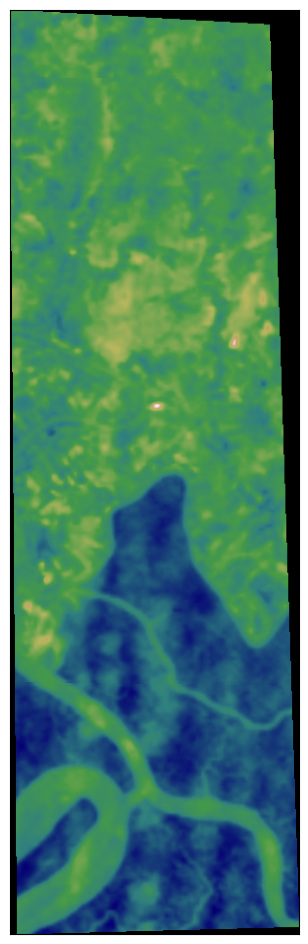

In [10]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')
S_sentinel_bands = glob("/content/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff")
S_sentinel_bands.sort()

l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

# Check if 'l' is empty before stacking
if l:
    arr_st = np.stack(l)
    ep.plot_bands(arr_st, cmap='gist_earth', figsize=(20, 12), cols=6, cbar=False)
    plt.show()
else:
    print("No files found or 'l' is empty. Skipping stacking.") # Handle empty case

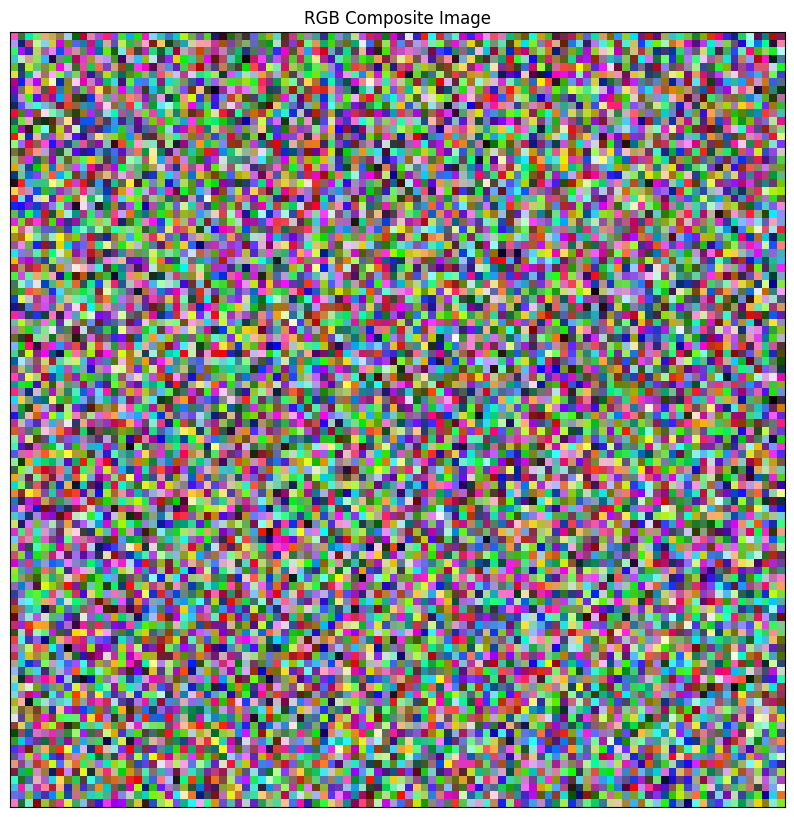

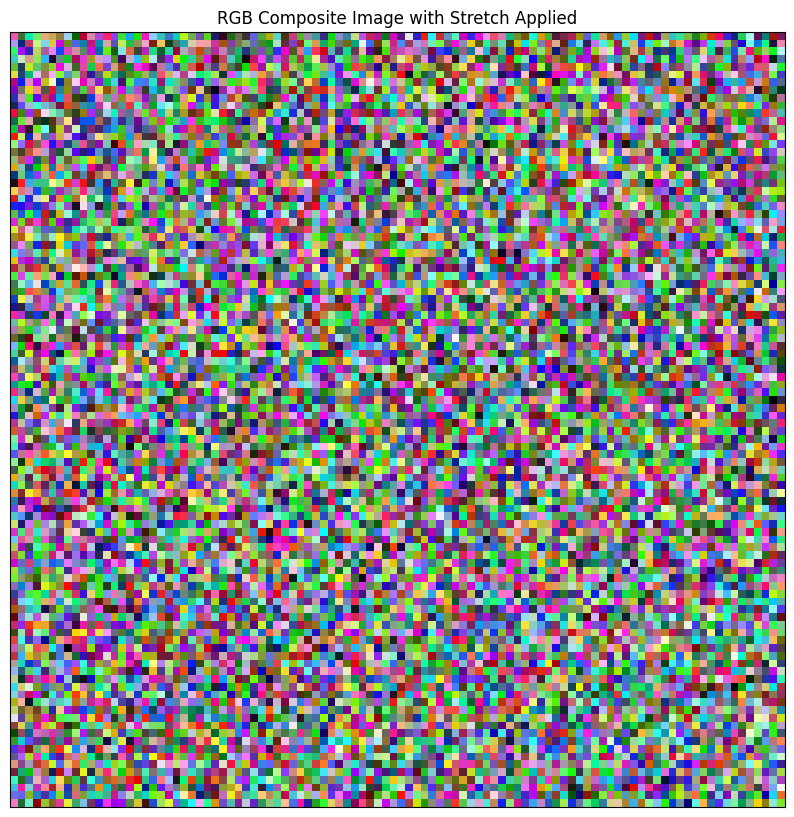

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import earthpy.plot as ep

# Dummy array (Replace with your actual satellite image array)
arr_st = np.random.rand(4, 100, 100)  # Simulating a 4-band (e.g., Landsat) image

# Plot without stretch
ep.plot_rgb(
    arr_st, rgb=(3, 2, 1), figsize=(10, 16), title='RGB Composite Image'
)
plt.show()

# Plot with stretch applied
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,  # Boolean value
    str_clip=0.2,  # Stretch clip percentage
    figsize=(10, 16),
    title="RGB Composite Image with Stretch Applied"
)
plt.show()


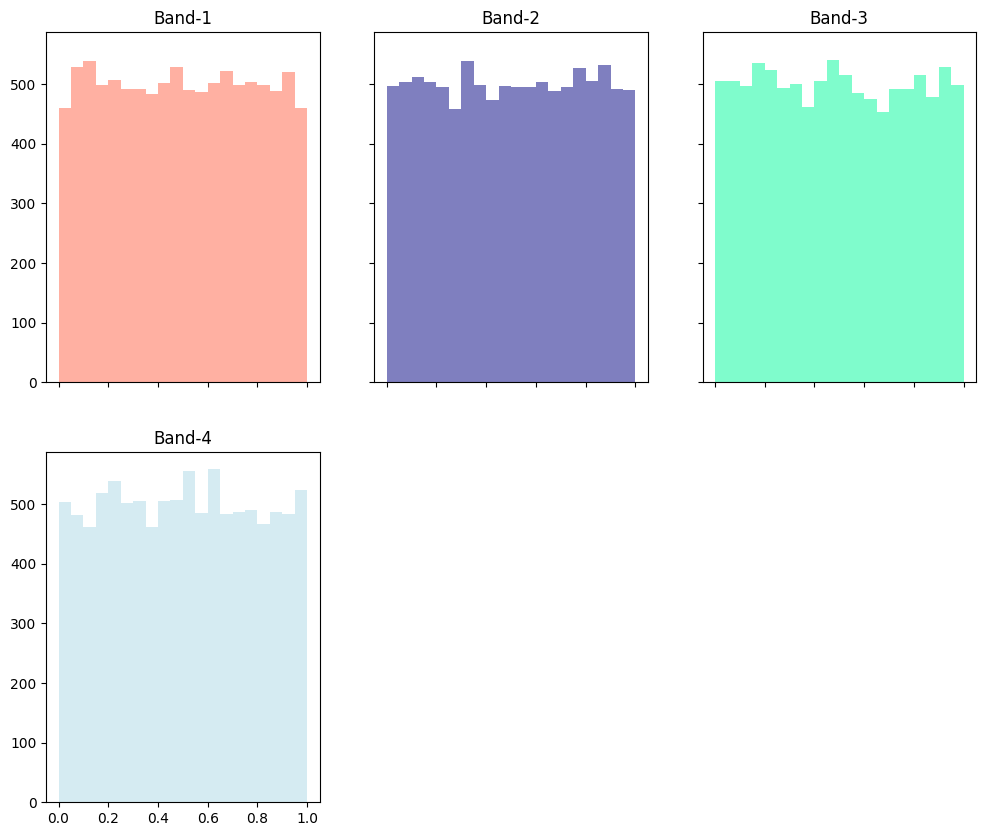

In [16]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

# Adjust the title list to match the number of layers in arr_st
ep.hist(arr_st,
         colors=colors,
         title=[f'Band-{i}' for i in range(1, arr_st.shape[0] + 1)],  # Changed here
         cols=3,
         alpha=0.5,
         figsize=(12, 10)
         )

plt.show()

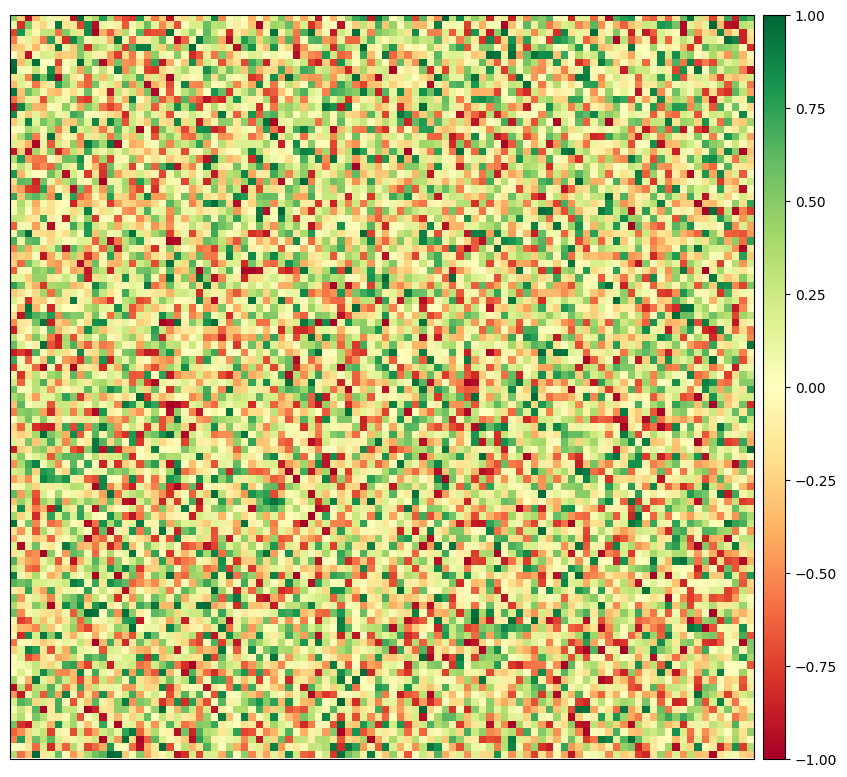

In [18]:
ndvi = es.normalized_diff(arr_st[3], arr_st[2]) # Changed band indices to 3 and 2
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()